In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv("C:\\Users\\bhupal\\Desktop\\titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
df.Age.isnull().sum()

177

# DROPING THE UNNECESSARY COLUMNS

In [21]:
df.drop(["Name","Ticket","Cabin"],axis=1,inplace=True)

# CONVERTING INTO 0'S AND 1'S  

In [22]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [23]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Sex']= label_encoder.fit_transform(df['Sex'])
  
df['Sex'].unique()

array([1, 0])

<Axes: xlabel='Sex', ylabel='count'>

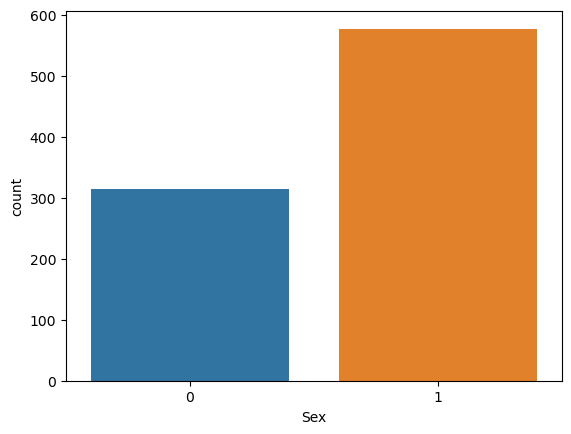

In [24]:
sns.countplot(x="Sex",data=df)

In [ ]:
#p=groupby.df["Survived"]
#df=p.Embarked.unique()

In [25]:
df.Embarked.isnull().sum()

2

In [26]:
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column 'species'.
df['Embarked']= label_encoder.fit_transform(df['Embarked'])
df['Embarked'].unique()

array([2, 0, 1, 3])

(array([168.,  77., 646.]),
 array([0., 1., 2., 3.]),
 <BarContainer object of 3 artists>)

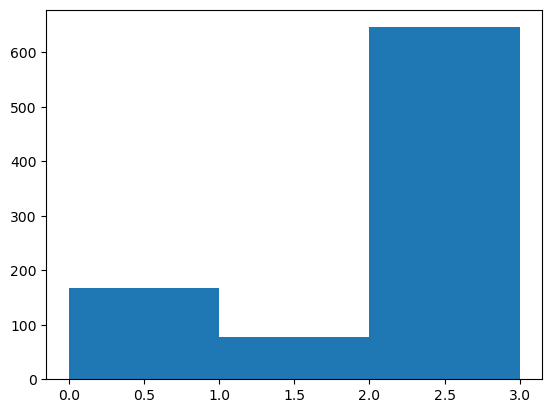

In [27]:
plt.hist(df.Embarked,bins=3)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


# REPLACING NAN VALUES AND FILLING IT WITH MEDIAN

In [29]:
df.Age.median()

28.0

In [30]:
df.Age.fillna(28,inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [31]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,0.012658,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.157112
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.104057
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.014205
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.066654
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.038322
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.221226
Embarked,0.013083,-0.163517,0.157112,0.104057,-0.014205,0.066654,0.038322,-0.221226,1.000000


<Axes: >

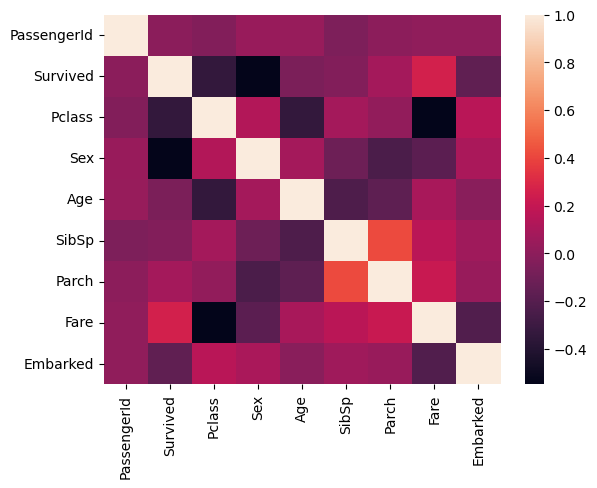

In [32]:
sns.heatmap(df.corr())

# TWO COLUMNS HAVING POSITIVE RELATION SO ADDIND IT

In [33]:
df["sp"]=df["SibSp"]+df["Parch"]+1
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sp
0,1,0,3,1,22.0,1,0,7.2500,2,2
1,2,1,1,0,38.0,1,0,71.2833,0,2
2,3,1,3,0,26.0,0,0,7.9250,2,1
3,4,1,1,0,35.0,1,0,53.1000,2,2
4,5,0,3,1,35.0,0,0,8.0500,2,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2,1
887,888,1,1,0,19.0,0,0,30.0000,2,1
888,889,0,3,0,28.0,1,2,23.4500,2,4
889,890,1,1,1,26.0,0,0,30.0000,0,1


In [34]:
df.drop(["SibSp","Parch"],axis=1,inplace=True)

In [35]:
df.drop(["PassengerId"],axis=1,inplace=True)

In [36]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,sp
0,0,3,1,22.0,7.2500,2,2
1,1,1,0,38.0,71.2833,0,2
2,1,3,0,26.0,7.9250,2,1
3,1,1,0,35.0,53.1000,2,2
4,0,3,1,35.0,8.0500,2,1
...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,2,1
887,1,1,0,19.0,30.0000,2,1
888,0,3,0,28.0,23.4500,2,4
889,1,1,1,26.0,30.0000,0,1


# TESTING THE DATA

In [37]:
x=df.drop(["Survived"],axis=1).values
y=df["Survived"].values

In [38]:
x,y

(array([[ 3.    ,  1.    , 22.    ,  7.25  ,  2.    ,  2.    ],
        [ 1.    ,  0.    , 38.    , 71.2833,  0.    ,  2.    ],
        [ 3.    ,  0.    , 26.    ,  7.925 ,  2.    ,  1.    ],
        ...,
        [ 3.    ,  0.    , 28.    , 23.45  ,  2.    ,  4.    ],
        [ 1.    ,  1.    , 26.    , 30.    ,  0.    ,  1.    ],
        [ 3.    ,  1.    , 32.    ,  7.75  ,  1.    ,  1.    ]]),
 array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [40]:
x_train,y_train

(array([[ 3.    ,  0.    , 28.    , 15.2458,  0.    ,  3.    ],
        [ 2.    ,  1.    , 31.    , 10.5   ,  2.    ,  1.    ],
        [ 2.    ,  1.    , 31.    , 37.0042,  0.    ,  3.    ],
        ...,
        [ 3.    ,  1.    , 28.    ,  7.7333,  1.    ,  1.    ],
        [ 3.    ,  0.    , 36.    , 17.4   ,  2.    ,  2.    ],
        [ 2.    ,  1.    , 60.    , 39.    ,  2.    ,  3.    ]]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        0

In [41]:
x_test,y_test

(array([[  3.    ,   1.    ,  28.    ,  14.4583,   0.    ,   1.    ],
        [  3.    ,   1.    ,  28.    ,   7.55  ,   2.    ,   1.    ],
        [  3.    ,   1.    ,   7.    ,  29.125 ,   1.    ,   6.    ],
        ...,
        [  1.    ,   0.    ,  31.    , 113.275 ,   0.    ,   2.    ],
        [  3.    ,   1.    ,  23.    ,   7.8542,   2.    ,   1.    ],
        [  3.    ,   1.    ,  19.    ,   8.05  ,   2.    ,   1.    ]]),
 array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 

# BUILDING THE MODEL

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lrpred=lr.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test,lrpred)

0.8100558659217877

In [46]:
 lr.predict([[2,0,33.0,27.750,2,4]])

array([1], dtype=int64)

In [47]:
df.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,sp
366,1,1,0,60.0,75.2500,0,2
783,0,3,1,28.0,23.4500,2,4
294,0,3,1,24.0,7.8958,2,1
85,1,3,0,33.0,15.8500,2,4
759,1,1,0,33.0,86.5000,2,1


# saving the file in pickle format


In [49]:
import pickle

In [51]:
with open ("titanic_pickle",'wb') as f:
    pickle.dump(lr,f)